In [18]:
import evolving_SBM_generate
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from collections import defaultdict
from math import sqrt, pi, exp
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from matplotlib.path import Path
from matplotlib.patches import PathPatch
import networkx as nx

In [34]:
graphs = {}
graph_1 = {}
graph_2 = {}

graphs['1'] = graph_1
graphs['2'] = graph_2


graph_1['n_per_group'] = 30
graph_1['n_groups'] = 2
graph_1['t_start'] = 0
graph_1['t_end'] = 100
graph_1['basis_num_communities'] = 2
graph_1['powers_num_communities'] = [1]
graph_1['list_p_within_community'] = [45/50] * len(graph_1['powers_num_communities'])

graph_1['inter_tau'] = 5
graph_1['activ_tau'] = 0.1


graph_2['n_per_group'] = 15
graph_2['n_groups'] = 4
graph_2['t_start'] = 0
graph_2['t_end'] = 100
graph_2['basis_num_communities'] = 2
graph_2['powers_num_communities'] = [2]
graph_2['list_p_within_community'] = [45/50] * len(graph_2['powers_num_communities'])

graph_2['inter_tau'] = 5
graph_2['activ_tau'] = 0.1

for i in [1,2]:
    graphs[f'{i}']['net'] = evolving_SBM_generate.generate_evolving_SBM(inter_tau =  graphs[f'{i}']['inter_tau'], activ_tau =  graphs[f'{i}']['activ_tau'],
                          n_per_group = graphs[f'{i}']['n_per_group'], n_groups = graphs[f'{i}']['n_groups'],
                          t_start = graphs[f'{i}']['t_start'], t_end = graphs[f'{i}']['t_end'],
                          basis_num_communities = graphs[f'{i}']['basis_num_communities'], powers_num_communities = graphs[f'{i}']['powers_num_communities'], list_p_within_community = graphs[f'{i}']['list_p_within_community'])


PID  19602  :  merged  46  events
PID  19602  :  merged  0  events
PID  19602  :  merged  94  events
PID  19602  :  merged  0  events


In [35]:
for i in [1,2]:
    graphs[f'{i}']['net']._compute_time_grid()

In [36]:
graphs['1']['net'].compute_laplacian_matrices(save_adjacencies=True, random_walk=False)
number_active_events = []

for i,t in enumerate(graphs['1']['net'].times[:-1]):
    number_active_events.append(np.sum(graphs['1']['net'].adjacencies[i].toarray()) / 2)

graphs['2']['net'].compute_laplacian_matrices(save_adjacencies=True, random_walk=False)

In [45]:
matrices_times= {'(a)':20, '(b)':50, '(c)':80}

matrices_1 = {}
for key, time in matrices_times.items():
    index_t_before = np.where(graphs['1']['net'].times <= time)[0][-1]
    matrices_1[key] = graphs['1']['net'].adjacencies[index_t_before].toarray()

matrices_2 = {}
for key, time in matrices_times.items():
    index_t_before = np.where(graphs['2']['net'].times <= time)[0][-1]
    matrices_2[key] = graphs['2']['net'].adjacencies[index_t_before].toarray()

/var/folders/39/mrj9jtrn5fb2d2f71qw3dhy80000gn/T/ipykernel_19602/2561155511.py:112: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


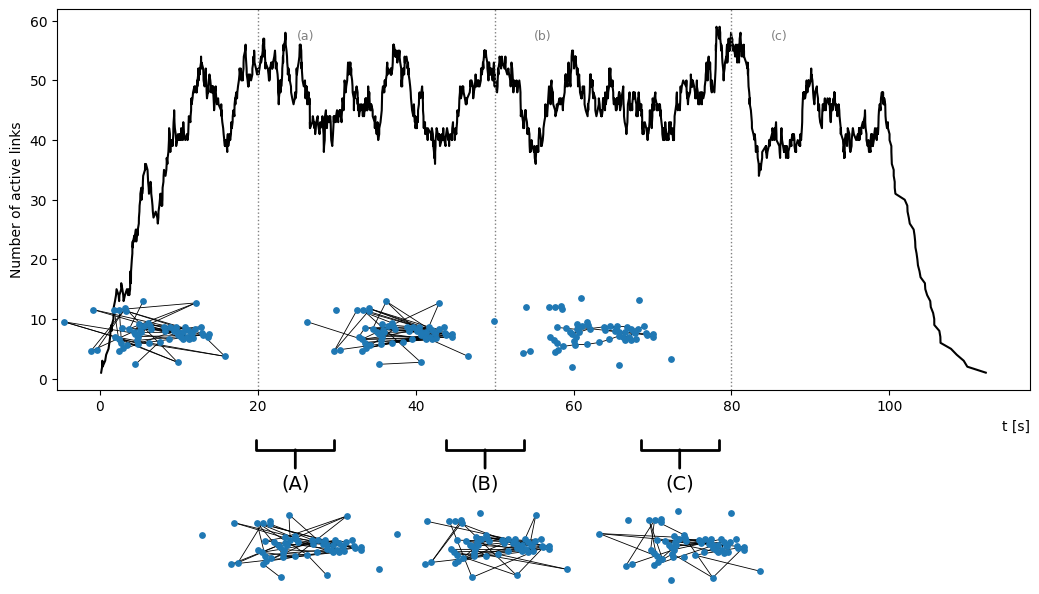

In [46]:
fig, ax = plt.subplots(figsize=(10.5, 5.2))

color = 'black'
cmap = "plasma"

ax.plot(graphs['1']['net'].times[:-1], number_active_events, color=color)

ax.set_xlabel("t [s]", loc="right")
ax.set_ylabel("Number of active links", color=color)
ax.tick_params(axis='y', labelcolor=color)


# Give some extra room at the bottom for insets and braces
fig.subplots_adjust(bottom=0.1)


# Adjacency ABOVE X-AXIS
insets = []
for key, matrix in matrices_1.items():
    insets.append(matrix)

positions = [-0.01, 0.24, 0.44, 0.76]

# Matrices share the same node set, so fix the layout so the
# node positions stay consistent across snapshots:
G_ref = nx.from_numpy_array(matrix)  # or from_scipy_sparse_array(...)
pos_layout = nx.spring_layout(G_ref, seed=0)  # or nx.circular_layout(G_ref)

for i, (matrix, pos) in enumerate(zip(insets, positions)):
    inset_ax = inset_axes(
        ax,
        width="20%", height="20%",
        loc="upper left",
        bbox_to_anchor=(pos, -0.75, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0
    )
    # Build graph from adjacency matrix
    G = nx.from_numpy_array(matrix)   # use create_using=nx.DiGraph() if directed

    # Draw the graph instead of a heatmap
    nx.draw(
        G,
        pos=pos_layout,           # reuse layout for all snapshots
        ax=inset_ax,
        node_size=15,             # tune for aesthetics
        width=0.6,                # edge width
        with_labels=False
    )

    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

# Visual cues where arrivals stop
for key, time in matrices_times.items():
    ax.axvline(time, color="gray", linestyle=":", linewidth=1.0)
    ax.text(time+ 5, ax.get_ylim()[1]*0.92, key, color="gray", fontsize=9)

# SNAPSHOT MATRICES BELOW X-AXIS
positions = [0.14, 0.34, 0.54]

insets = []
for key, matrix in matrices_2.items():
    insets.append(matrix)

for i, (matrix, pos) in enumerate(zip(insets, positions)):
    inset_ax = inset_axes(
        ax,
        width="20%", height="20%",
        loc="upper left",
        bbox_to_anchor=(pos, -1.31, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0
    )
    # Build graph from adjacency matrix
    G = nx.from_numpy_array(matrix)   # use create_using=nx.DiGraph() if directed

    # Draw the graph instead of a heatmap
    nx.draw(
        G,
        pos=pos_layout,           # reuse layout for all snapshots
        ax=inset_ax,
        node_size=15,             # tune for aesthetics
        width=0.6,                # edge width
        with_labels=False
    )

    inset_ax.set_axis_off()
    #inset_ax.matshow(matrix, aspect='equal', cmap=cmap) #,norm=norm)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

# Add curly brackets for (0,100) and (100,200)
# y and brace_height are in axes coordinates; x0, x1 in data coordinates
ax.annotate('(A)', xy=(0.245, -0.15), xytext=(0.245, -0.27),
    fontsize=14, ha='center', va='bottom', xycoords='axes fraction',
    arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.5', lw=2.0))

ax.annotate('(B)', xy=(0.44, -0.15), xytext=(0.44, -0.27),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.5', lw=2.0))

ax.annotate('(C)', xy=(0.64, -0.15), xytext=(0.64, -0.27),
            fontsize=14, ha='center', va='bottom', xycoords='axes fraction', 
            arrowprops=dict(arrowstyle='-[, widthB=2, lengthB=.5', lw=2.0))
# # Optional: add text labels under the brackets
# ax.text(50, -0.16, "(0, 100)", ha='center', va='top',
#         transform=ax.get_xaxis_transform())
# ax.text(150, -0.16, "(100, 200)", ha='center', va='top',
#         transform=ax.get_xaxis_transform())

plt.tight_layout()
# plt.savefig('/Users/samuelkoovely/Desktop/fig_EDEDE/fig_EDEDE_events.pdf', format='pdf',bbox_inches='tight',
#     pad_inches=0.05) # small padding around
plt.show()

/var/folders/39/mrj9jtrn5fb2d2f71qw3dhy80000gn/T/ipykernel_19602/608197398.py:64: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


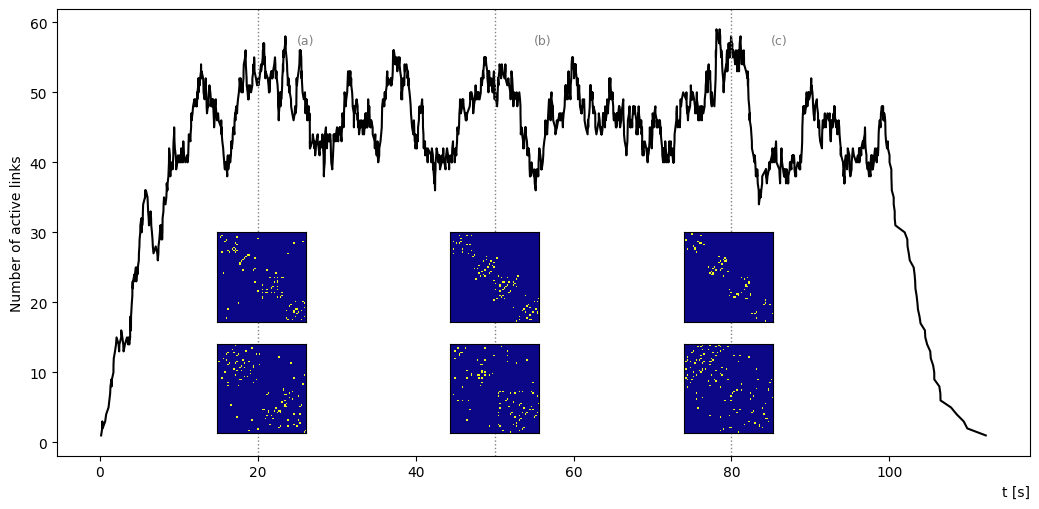

In [50]:
fig, ax = plt.subplots(figsize=(10.5, 5.2))

color = 'black'
cmap = "plasma"

ax.plot(graphs['1']['net'].times[:-1], number_active_events, color=color)

ax.set_xlabel("t [s]", loc="right")
ax.set_ylabel("Number of active links", color=color)
ax.tick_params(axis='y', labelcolor=color)


# Give some extra room at the bottom for insets and braces
fig.subplots_adjust(bottom=0.1)


# Adjacency ABOVE X-AXIS
insets = []
for key, matrix in matrices_1.items():
    insets.append(matrix)

positions = [0.11, 0.35, 0.59]


for i, (matrix, pos) in enumerate(zip(insets, positions)):
    inset_ax = inset_axes(
        ax,
        width="20%", height="20%",
        loc="upper left",
        bbox_to_anchor=(pos, -0.75, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0
    )
    
    inset_ax.matshow(matrix, aspect='equal', cmap=cmap)#, norm=norm)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

# Visual cues where arrivals stop
for key, time in matrices_times.items():
    ax.axvline(time, color="gray", linestyle=":", linewidth=1.0)
    ax.text(time+ 5, ax.get_ylim()[1]*0.92, key, color="gray", fontsize=9)

# SNAPSHOT MATRICES BELOW X-AXIS

insets = []
for key, matrix in matrices_2.items():
    insets.append(matrix)

for i, (matrix, pos) in enumerate(zip(insets, positions)):
    inset_ax = inset_axes(
        ax,
        width="20%", height="20%",
        loc="upper left",
        bbox_to_anchor=(pos, -0.5, 1, 1),
        bbox_transform=ax.transAxes,
        borderpad=0
    )

    inset_ax.matshow(matrix, aspect='equal', cmap=cmap) #,norm=norm)
    inset_ax.set_xticks([])
    inset_ax.set_yticks([])

plt.tight_layout()
# plt.savefig('/Users/samuelkoovely/Desktop/fig_EDEDE/fig_EDEDE_events.pdf', format='pdf',bbox_inches='tight',
#     pad_inches=0.05) # small padding around
plt.show()